# Project: No-Show appointment Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This project analyzes the data regarding the failure of appointees to keep their date or appointments. I would be investigating the factors responsible for the failure of patients to show up for their appointments.
the dataset , Database_No_show_appointments, was used for this analysis and it was downloaded from  <a href="https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd2e9a_noshowappointments-kagglev2-may-2016/noshowappointments-kagglev2-may-2016.csv.">kaggle.com</a>

The dataset analyzed was downloaded from kaggle.com and represents a sample size of over 100 thousand medical appointments in Brazil.
Based on My findings, I should be able to predict whether or not a patient would show up for his/her appointment and explain why.

>**Column Names**:

The following variables are analyzed in this data set
1. PatientId    : This is a unique identifier for each patient. No two patient has the same Id. 
2. AppointmentID : Uniquely identifies the appointment records and details. Again this is unique for each appointment made.  
3. Gender: Tells us whether the patient is male or female           
4. ScheduledDay : this tells us the time that the appointment was fixed for on the appointment day (this should be renamed as scheduledTime because there is another column that tells us what date the appointment was for)this tells us what day the appointment was set for. 
5. AppointmentDay: This column gives us information about the date of the appointment. the date is formatted as pd.datetime  
6. Age    : Specifies the age of the patients         
7. Neighbourhood : this tells us the location of the hospital. unfortunately there is no measurement of the distance between the hospital and the location. this would have provided an insight into how distance affects the tendency to keep appointments
8. Scholarship : indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família. 
9. Hipertension
10. Diabetes        
11. Alcoholism      
12. Handcap         
13. SMS_received 
14. No-show : Tells us whether the patient showed up or not for their appointment. It says NO if they did and yes if they didn't


### Question(s) for Analysis

1. How does having Diabetes impact a patient's ability to show up for appointments
2. How does a patient's gender influence his/her ability to show up for appointments?
3. what is the correlation between a patients Age and attendance
4. will providing medical financial assistance impact a patient's ability to show up for appointments?
5. how likely is is for a hypertensive patient to miss appointments?
6. How does Alcoholism affect a patients ability to show up for appointments
7. what happens when a patient is an alcoholic, has no financial support?

In [1]:
# import statements for all of the packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

In [3]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
df.shape 

(110527, 14)

In [6]:
# Check for missing entries
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [7]:
# Check for duplicate entries
df.duplicated().sum()

0

In [8]:
# Compare the columns ScheduledDay and AppointmentDay
df['ScheduledDay'].tail(), df['AppointmentDay'].tail()
#columns do not contain the same information and for the purpose of this analysis they are no longer relevant. they should be dropped

(110522    2016-05-03T09:15:35Z
 110523    2016-05-03T07:27:33Z
 110524    2016-04-27T16:03:52Z
 110525    2016-04-27T15:09:23Z
 110526    2016-04-27T13:30:56Z
 Name: ScheduledDay, dtype: object,
 110522    2016-06-07T00:00:00Z
 110523    2016-06-07T00:00:00Z
 110524    2016-06-07T00:00:00Z
 110525    2016-06-07T00:00:00Z
 110526    2016-06-07T00:00:00Z
 Name: AppointmentDay, dtype: object)


# Data Cleaning

### Clean up operations to be made are
1. Rename columns SMS_received and No-show Hipertension and Handcap
2. Replace values in Column NoShow make No read 1 and Yes read 0 
(thereby correcting the other anomaly which is that no was used to represent a confirmed appointment and vice-versa)
3. Change the data type of NoShow to int 
4. drop the PatientId, AppointmentID, Neighbourhood, AppointmentDay and ScheduledDay columns

In [9]:
#Rename columns SMS_received and No-show for uniformity
df=df.rename(columns = {'SMS_received' : 'SmsReceived', 'No-show' : 'NoShow', 'Hipertension' : 'Hypertension', 'Handcap' : 'Handicapped'})


In [10]:
#Replace values in Column NoShow make "No" read 1 and "Yes" read 0 
#(thereby correcting the other anomaly which is that no was used to represent a confirmed appointment)

df['NoShow'] = df['NoShow'].replace(['Yes', 'No'],['0', '1'])

In [11]:
# Change the datatype of NoShow to int
df['NoShow'] = df['NoShow'].astype(int)

In [12]:
#Drop the columns ScheduledDay AppointmentDay and Neighbourhood
df.drop(['AppointmentDay', 'ScheduledDay', 'Neighbourhood', 'PatientId', 'AppointmentID'], axis = 1, inplace = True)

We Check to see if the changes were applied

In [13]:
#check to see if all the changes have worked
df.head()

,Gender,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicapped,SmsReceived,NoShow
0,F,62,0,1,0,0,0,0,1
1,M,56,0,0,0,0,0,0,1
2,F,62,0,0,0,0,0,0,1
3,F,8,0,0,0,0,0,0,1
4,F,56,0,1,1,0,0,0,1


In [14]:
df.tail()

,Gender,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicapped,SmsReceived,NoShow
110522,F,56,0,0,0,0,0,1,1
110523,F,51,0,0,0,0,0,1,1
110524,F,21,0,0,0,0,0,1,1
110525,F,38,0,0,0,0,0,1,1
110526,F,54,0,0,0,0,0,1,1


In [15]:
df.shape

(110527, 9)

<a id='eda'></a>
## Exploratory Data Analysis

In [16]:
df.describe()

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicapped,SmsReceived,NoShow
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,0.798067
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,0.401444
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


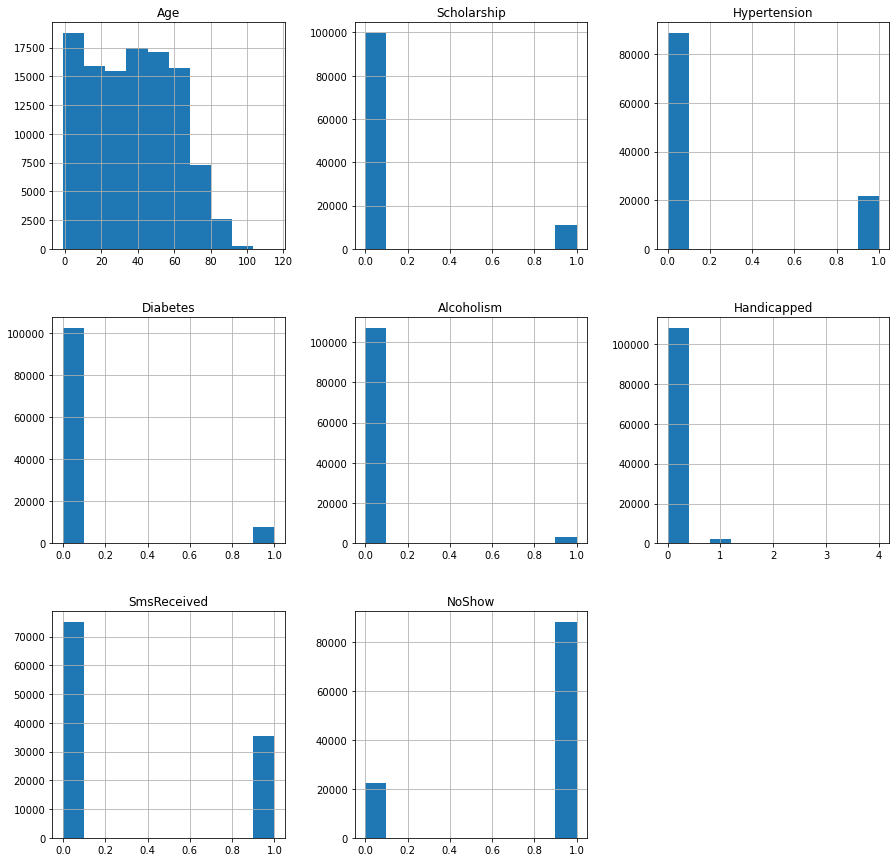

In [17]:
df.hist(figsize = (15,15));

let us first declare some useful variables and define them

In [18]:
# the number of appointments showed up for
attended = df.NoShow == 1 
# the number of appointments missed
missed = df.NoShow == 0
# the number of diabetic patients
diabetic = df.Diabetes == 1
#the number of non diabetic patients
not_diabetic = df.Diabetes == 0
# patients on 
scholarship = df.Scholarship == 1
no_scholarship = df.Scholarship == 0
# alcoholic patients
alcoholic = df.Alcoholism == 1
not_alcoholic = df.Alcoholism == 0
# Gender
males = df.Gender == 'M'
females = df.Gender == 'F'
# Hypertensive Patients
hypertensive = df.Hypertension == 1
not_hypertensive = df.Hypertension == 0
#Sms Reception
sms_received = df.SmsReceived == 1
no_sms_received = df.SmsReceived == 0
# Handicap
handicapped = df.Handicapped == 1
not_handicapped = df.Handicapped == 0


In [19]:
# defining these variables allows me to do some deep cross column analysis. for instance let's say i needed the ages of
# females from the sample who, are diabetic, are alcoholic, and showed up for their appointments then i'd find it just like this
dasAge = df.Age[females][attended][diabetic][alcoholic]

## How does having Diabetes impact a patient's ability to show up for appointments

In [20]:
diabetes_group = df.groupby("Diabetes")
diabetes_group.NoShow.describe()

,count,mean,std,min,25%,50%,75%,max
Diabetes,,,,,,,,
0,102584.0,0.796372,0.402698,0.0,1.0,1.0,1.0,1.0
1,7943.0,0.819967,0.384239,0.0,1.0,1.0,1.0,1.0


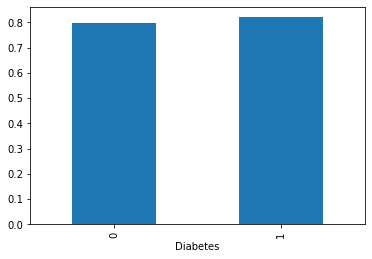

In [21]:
diabetes_group.NoShow.mean().plot(kind = 'bar');

In [22]:
#the diabetic patients who attended their appointments
diabetic_showed = df.NoShow[diabetic][attended].count() 
# patients without diabetes who attended their sessions 
not_diabetic_showed = df.NoShow[not_diabetic][attended].count() 

In [23]:
#the diabetic patients who attended their appointments
diabetic_missed = df.NoShow[missed][diabetic].count()
# patients without diabetes who missed their sessions 
not_diabetic_missed = df.NoShow[missed][not_diabetic].count()
# OR
#df.Diabetes[missed][not_diabetic].count() 

from the sample of diabetic , a total of 7943, A much larger proportion of patients with diabetes were found to have shown up for their appointments than those with diabetes who didn't 6513 to 1430

## How does a patient's gender influence his/her ability to show up for appointments?

In [24]:
sex_group = df.groupby('Gender')

<AxesSubplot:xlabel='Gender'>

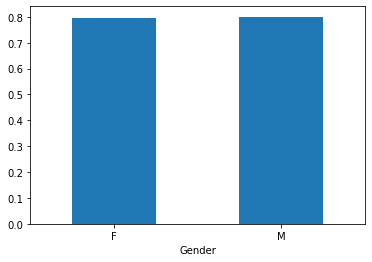

In [25]:
sex_group.NoShow.mean().plot(kind = "bar", rot =0);

80% of males in this study showed up for their appointments while 79.6% (approx. 80%) of females showed up for their appointment. since there is no significant difference, we can conclude that gender difference does not have a significant impact on patients showing up for their appointments

## What is the correlation between a patients Age and attendance?

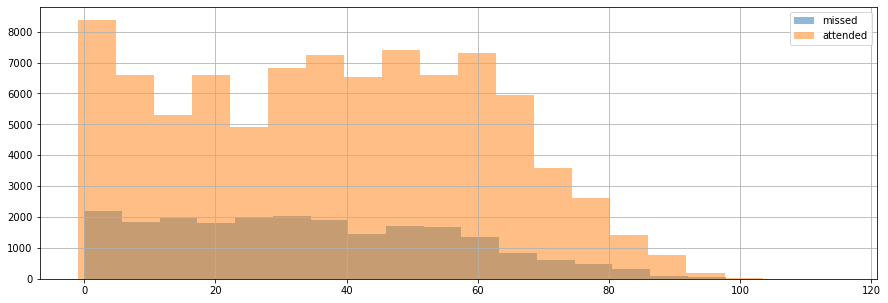

In [26]:
df.Age[missed].hist(alpha=0.5, bins=20, label = 'missed', figsize = (15,15))
df.Age[attended].hist(alpha=0.5, bins=20, label = 'attended', figsize = (15,5))
plt.legend();

## will providing medical financial assistance impact a patient's ability to show up for appointments?

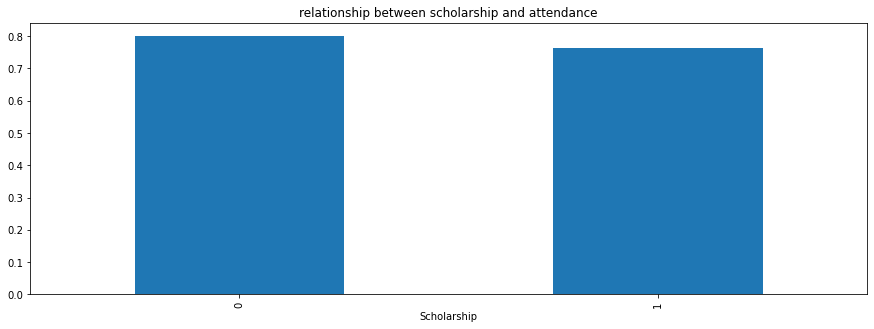

In [27]:
scholarship_group = df.groupby('Scholarship')
scholarship_group.NoShow.mean().plot(kind = 'bar', figsize = (15,5), title ="relationship between scholarship and attendance" );

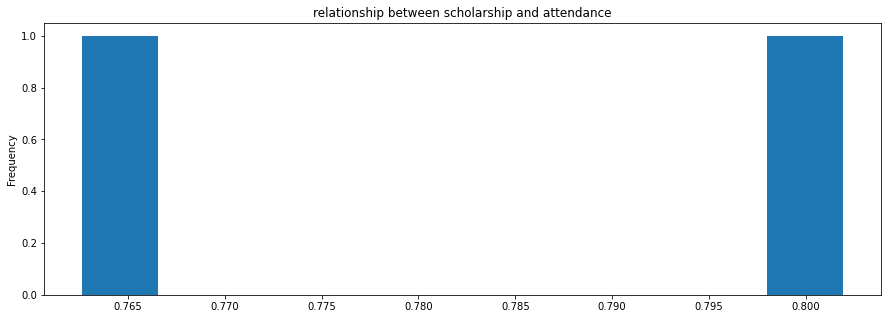

In [28]:
scholarship_group.NoShow.mean().plot(kind = 'hist', figsize = (15,5), title ="relationship between scholarship and attendance" );

In [29]:
# Patients with scholarships who showed up for their appointment
scholarship_showed = df.NoShow[scholarship][attended].count()
no_scholarship_showed = df.NoShow[no_scholarship][attended].count()
scholarship_missed = df.NoShow[scholarship][missed].count()
no_scholarship_missed = df.NoShow[no_scholarship][missed].count()

## how likely is is for a hypertensive patient to miss appointments?

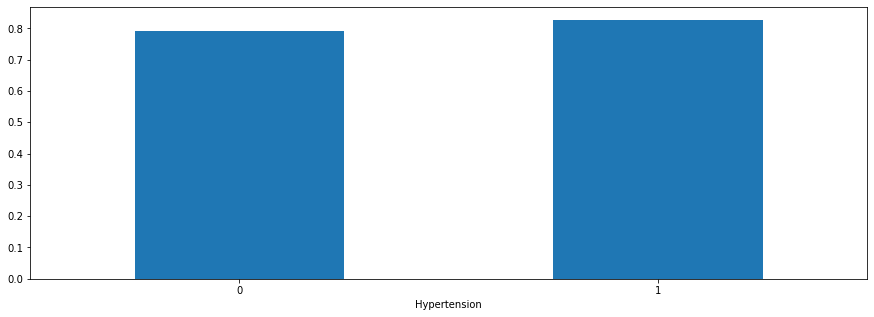

In [30]:
hypertension_group = df.groupby("Hypertension")
hypertension_group.NoShow.mean().plot(kind = 'bar', rot = 0, figsize = (15,5));

In [31]:
# Patients with scholarships who showed up for their appointment
hypertension_showed = df.NoShow[hypertensive][attended].count()
no_hypertension_showed = df.NoShow[not_hypertensive][attended].count()
hypertension_missed = df.NoShow[hypertensive][missed].count()
no_hypertension_missed = df.NoShow[not_hypertensive][missed].count()

## How does Alcoholism affect a patients ability to show up for appointments

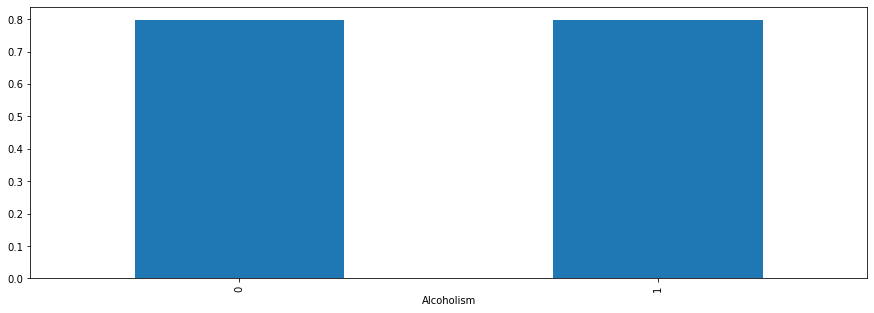

In [32]:
alcoholic_group = df.groupby('Alcoholism')
alcoholic_group.NoShow.mean().plot(kind = 'bar',figsize = (15,5));

In [33]:
# Patients with scholarships who showed up for their appointment
alcoholic_showed = df.NoShow[alcoholic][attended].count()
not_alcoholic_showed = df.NoShow[not_alcoholic][attended].count()
alcoholic_missed = df.NoShow[alcoholic][missed].count()
not_alcoholic_missed = df.NoShow[alcoholic][missed].count()

additional information on the classification of handicaps need to be provided for further evaluation

## will sending sms reminders improve attendance

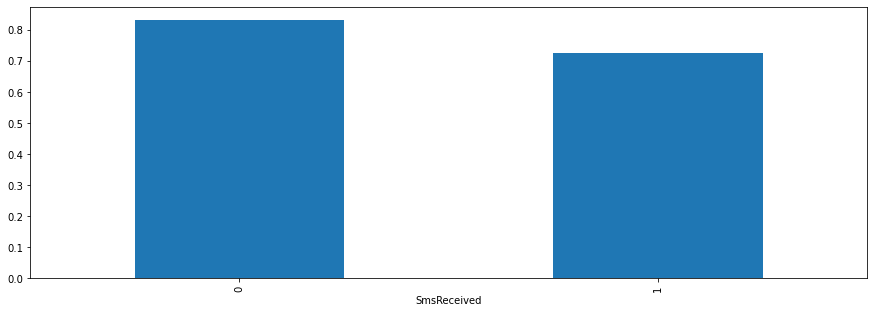

In [34]:
sms_group = df.groupby('SmsReceived')
sms_group.NoShow.mean().plot(kind = 'bar', figsize = (15,5));

In [35]:
# Patients with scholarships who showed up for their appointment
receivedsms_showed = df.NoShow[sms_received][attended].count()
not_receivedsms_showed = df.NoShow[no_sms_received][attended].count()
receivedsms_missed = df.NoShow[sms_received][missed].count()
not_receivedsms_missed = df.NoShow[no_sms_received][missed].count()

## What would happen to the attendance of a patient who was an alcoholic with no medical assistance and didn't receive an sms

In [36]:
#Total number of patients who are alcoholic with no scholarship and sms reception
ASR = df.Alcoholism[diabetic][no_scholarship].count()
ASR

7374

In [37]:
#Alcoholic-noscholarship-nosmsreceived that showed up
ASR_attended = df.Alcoholism[diabetic][no_scholarship][attended].count()
ASR_attended

6067

In [38]:
#Alcoholic-noscholarship-nosmsreceived that missed

ASR_missed = df.Alcoholism[diabetic][no_scholarship][missed].count()
ASR_missed

1307

In [39]:
ASR_missed/ASR_attended

0.21542772375144223

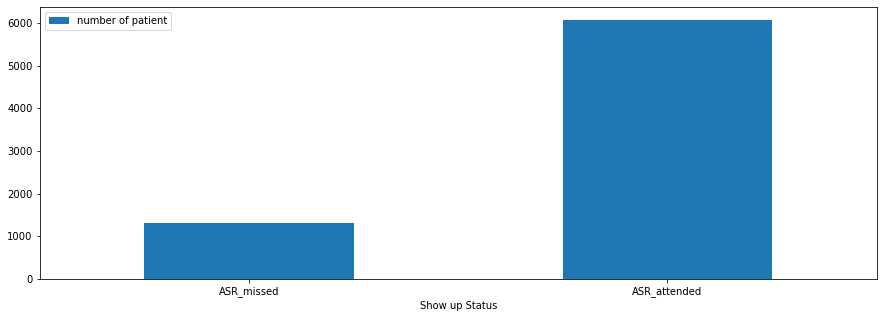

In [43]:
ASRdf = pd.DataFrame({
    'Show up Status': ['ASR_missed','ASR_attended'],
    'number of patient': [ASR_missed, ASR_attended],
    
})

ASRdf.plot(x="Show up Status", y=["number of patient"], kind="bar",  figsize =(15,5), rot = 0);


About 1 in 5 patients in this category would miss their appointments

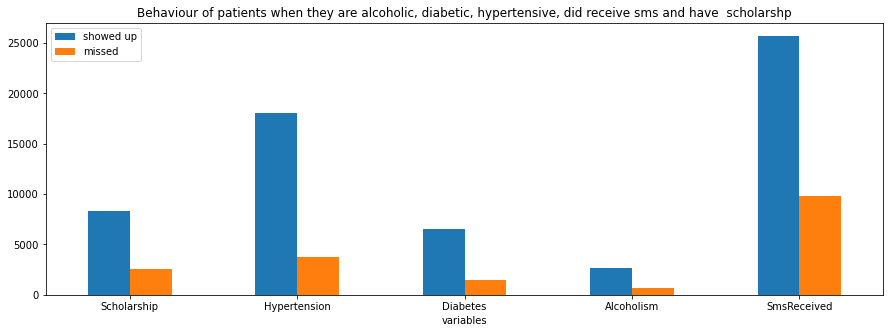

In [44]:
# Let us perform some analysis on patients behaviour when the have a scholarship, are hypertensive, are diabetic, are alcoholic
# and receive sms
# please note that all the variables used in this analysis have been defined above already we are just plotting them to visualize
#their relationship.
# creating dataframe
dc = pd.DataFrame({
    'variables': ['Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'SmsReceived'],
    'showed up': [scholarship_showed, hypertension_showed, diabetic_showed, alcoholic_showed,  receivedsms_showed],
    'missed': [scholarship_missed, hypertension_missed, diabetic_missed, alcoholic_missed,  receivedsms_missed]
    
})
charttitle = "Behaviour of patients when they are alcoholic, diabetic, hypertensive, did receive sms and have  scholarshp"

# plotting graph
dc.plot(x="variables", y=["showed up", "missed"], kind="bar", title =charttitle, figsize =(15,5), rot = 0);


The bar chart above shows the proportional relationship between
1. patients who had scholarship and showed up, and patients who had scholarship and missed their appointments
2. patients who had hypertension and showed up, and patients who had hypertension and missed their appointments
3. patients who had diabetes and showed up, and patients who had diabetes and missed their appointments
4. patients who were Alcoholic and showed up, and patients who were alcoholic and missed their appointments
5. patients who recieved sms and showed up, and patients who received sms and missed their appointments


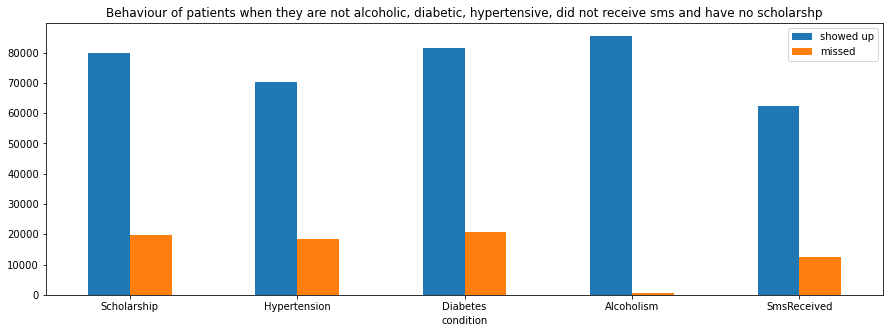

In [46]:
# Let us perform some analysis on patients behaviour when the have a scholarship, are hypertensive, are diabetic, are alcoholic
# and receive sms
# please note that all the variables used in this analysis have been defined above already
# creating dataframe
dw = pd.DataFrame({
    'condition': ['Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'SmsReceived'],
    'showed up': [no_scholarship_showed, no_hypertension_showed, not_diabetic_showed, not_alcoholic_showed, not_receivedsms_showed ],
    'missed': [no_scholarship_missed, no_hypertension_missed, not_diabetic_missed, not_alcoholic_missed, not_receivedsms_missed ]
    
})
charttitle = "Behaviour of patients when they are not alcoholic, diabetic, hypertensive, did not receive sms and have no scholarshp"
# plotting graph
dw.plot(x="condition", y=["showed up", "missed"], title = charttitle, kind="bar", figsize =(15,5), rot = 0);


The bar chart above shows the proportional relationship between

patients who had no scholarship and showed up, and patients who had no scholarship and missed their appointments
patients who had no hypertension and showed up, and patients who had no hypertension and missed their appointments
patients who had no diabetes and showed up, and patients who had no diabetes and missed their appointments
patients who were not Alcoholic and showed up, and patients who were not alcoholic and missed their appointments
patients who recieved no sms and showed up, and patients who received no sms and missed their appointments

In [47]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


<a id='conclusions'></a>
## Conclusions

> **Result Summary**: 

1. How does having Diabetes impact a patient's ability to show up for appointments: from the analysis i did i was able to conclude that it makes no difference whether a patient is diabetic or not
2. How does a patient's gender influence his/her ability to show up for appointments: There is also no correlation between gender and attendance
what is the correlation between a patients Age and attendance:

3. will providing medical financial assistance impact a patient's ability to show up for appointments?
providing scholarships really makes no difference
4. how likely is is for a hypertensive patient to miss appointments?
not very likely
5. How does Alcoholism affect a patients ability to show up for appointments
the analysis showed that the proportion of persons who were not alcoholic and showed up for their appointments was much higher than that of those who were. it is my conclusion that alcohol does have an impact on a person's ability to show up for  
what happens when a patient is an alcoholic, has no financial support?

useful information.
it would be useful to have the distances between the hospitals and a patients location. this would enable research into how distance affects attendance.
also, the time of the appointment. i.e whether morning noon or evening.

> **Limitation**: 
I had to disregard the data on handicap because there were classification of handicaps that were not properly understood.


## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [49]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1